In [1]:
import sys
import csv
import urllib
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDiA
from sklearn.metrics.pairwise import cosine_similarity
import math
%matplotlib inline

In [3]:
amlo_by_year = pd.read_csv("all_amlo_bis.csv",encoding='UTF-16')

In [4]:
amlo_by_year.head(20)

,date,text
0,"mayo 27, 2018",lópez obrador expresó someterá revocación ...
1,"mayo 25, 2018",iguala guerrero 25 mayo 2018 candidato co...
2,"mayo 24, 2018",observó costaría poca cosa 50 mill...
3,"mayo 23, 2018",autlán navarro jalisco 23 mayo 2018 andrés ...
4,"mayo 22, 2018",entrevista candidato coalición juntos hare...
5,"mayo 19, 2018",ciudad guzmán jalisco 19 mayo 2018 andrés ma...
6,"mayo 18, 2018",huajuapan león oaxaca 18 mayo 2018 andrés man...
7,"mayo 17, 2018",ciudad méxico 17 mayo 2018 candidato coa...
8,"mayo 17, 2018",si ex candidata independiente pactó anaya a...
9,"mayo 16, 2018",quiero saber términos declinación compren...


In [5]:
amlo_by_year['year'] = amlo_by_year['date'].apply(lambda x: x[-4:])
amlo_by_year = amlo_by_year.drop('date', axis=1)

In [6]:
amlo_by_year.head(20)

,text,year
0,lópez obrador expresó someterá revocación ...,2018
1,iguala guerrero 25 mayo 2018 candidato co...,2018
2,observó costaría poca cosa 50 mill...,2018
3,autlán navarro jalisco 23 mayo 2018 andrés ...,2018
4,entrevista candidato coalición juntos hare...,2018
5,ciudad guzmán jalisco 19 mayo 2018 andrés ma...,2018
6,huajuapan león oaxaca 18 mayo 2018 andrés man...,2018
7,ciudad méxico 17 mayo 2018 candidato coa...,2018
8,si ex candidata independiente pactó anaya a...,2018
9,quiero saber términos declinación compren...,2018


In [7]:
def data_by_year(df, year):
    return df[df['year'] == year].text

In [8]:
df_2012 = data_by_year(amlo_by_year, '2012')
df_2013 = data_by_year(amlo_by_year, '2013')
df_2014 = data_by_year(amlo_by_year, '2014')
df_2015 = data_by_year(amlo_by_year, '2015')
df_2016 = data_by_year(amlo_by_year, '2016')
df_2017 = data_by_year(amlo_by_year, '2017')
df_2018 = data_by_year(amlo_by_year, '2018')

In [9]:
len(df_2018)

111

# Example step by step

# 2012

In [203]:
#PCA analysis. Slightly adapting the code from the class' distributed notebooks.
tfidf_2012 = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs_2012 = tfidf_2012.fit_transform(raw_documents=df_2012).toarray()
tfidf_docs_2012 = pd.DataFrame(tfidf_docs_2012)
tfidf_docs_2012 = tfidf_docs_2012 - tfidf_docs_2012.mean()
tfidf_docs_2012.shape

(236, 13907)

In [204]:
tfidf_docs_2012

,0,1,2,3,4,5,6,7,8,9,...,13897,13898,13899,13900,13901,13902,13903,13904,13905,13906
0,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
1,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,0.018830,0.020230,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
2,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,0.018190,-0.000187,0.015825,-0.000188,-0.000749,-0.002349
3,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
4,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
5,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,0.034052,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
6,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
7,-0.000951,0.045595,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
8,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,0.018906,-0.003820,-0.000187,-0.004551,-0.000188,-0.000749,-0.002349
9,-0.000951,-0.002037,-0.000194,-0.000342,-0.000163,-0.000163,-0.000271,-0.000197,-0.00049,-0.000275,...,-0.000276,-0.000902,-0.004140,-0.004665,0.017492,-0.000187,0.015178,-0.000188,-0.000749,-0.002349


In [209]:
pca_2012 = PCA(n_components=10)
pca_2012 = pca_2012.fit(tfidf_docs_2012)
pca_topic_vectors_2012 = pca_2012.transform(tfidf_docs_2012)
columns = ['topic{}'.format(i) for i in range(pca_2012.n_components)]
pca_topic_vectors_2012 = pd.DataFrame(pca_topic_vectors_2012, 
                                 columns=columns)
pca_topic_vectors_2012.round(3).head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,-0.093,-0.081,0.156,-0.208,0.019,-0.006,-0.068,0.083,0.019,-0.016
1,-0.146,0.040,-0.035,-0.162,-0.014,-0.009,0.202,-0.019,-0.039,0.005
2,-0.008,0.365,0.087,-0.059,0.137,-0.149,0.083,-0.153,0.119,-0.065
3,-0.116,0.123,-0.027,-0.199,-0.037,-0.105,-0.084,-0.004,-0.069,0.078
4,-0.108,0.078,0.061,-0.062,-0.040,-0.082,0.015,-0.035,0.038,-0.040


In [210]:
svd_2012 = TruncatedSVD(n_components=10, n_iter=300)  
svd_topic_vectors_2012 = svd_2012.fit_transform(tfidf_docs_2012)
svd_topic_vectors_2012 = pd.DataFrame(svd_topic_vectors_2012, 
                                 columns=columns)
svd_topic_vectors_2012.round(2).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,-0.09,-0.08,0.16,-0.21,0.02,-0.01,-0.07,0.08,0.01,-0.02
1,-0.15,0.04,-0.03,-0.16,-0.01,-0.01,0.20,-0.01,-0.02,0.02
2,-0.01,0.37,0.09,-0.06,0.14,-0.15,0.09,-0.15,0.13,-0.07
3,-0.12,0.12,-0.03,-0.20,-0.04,-0.11,-0.08,0.00,-0.00,0.11
4,-0.11,0.08,0.06,-0.06,-0.04,-0.08,0.01,-0.03,0.02,-0.05
5,-0.09,0.18,0.10,-0.04,0.03,-0.10,0.05,-0.13,0.11,-0.04


In [211]:
svd_topic_vectors_2012 = (svd_topic_vectors_2012.T / 
                     np.linalg.norm(svd_topic_vectors_2012, axis=1)).T

In [212]:
svd_topic_vectors_2012.iloc[:10].dot(svd_topic_vectors_2012.iloc[:10].T).round(3)

,0,1,2,3,4,5,6,7,8,9
0,1.000,0.235,-0.102,0.428,0.377,0.063,0.112,-0.244,-0.297,-0.393
1,0.235,1.000,0.249,0.449,0.498,0.345,-0.109,0.109,-0.406,-0.421
2,-0.102,0.249,1.000,0.329,0.608,0.903,-0.187,0.681,-0.074,0.034
3,0.428,0.449,0.329,1.000,0.583,0.378,0.352,0.284,-0.275,-0.292
4,0.377,0.498,0.608,0.583,1.000,0.809,-0.051,0.231,-0.552,-0.526
5,0.063,0.345,0.903,0.378,0.809,1.000,-0.200,0.477,-0.369,-0.292
6,0.112,-0.109,-0.187,0.352,-0.051,-0.200,1.000,-0.388,0.384,0.417
7,-0.244,0.109,0.681,0.284,0.231,0.477,-0.388,1.000,0.222,0.187
8,-0.297,-0.406,-0.074,-0.275,-0.552,-0.369,0.384,0.222,1.000,0.963
9,-0.393,-0.421,0.034,-0.292,-0.526,-0.292,0.417,0.187,0.963,1.000


# 2013

In [213]:
tfidf_2013 = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs_2013 = tfidf_2013.fit_transform(raw_documents=df_2013).toarray()
tfidf_docs_2013 = pd.DataFrame(tfidf_docs_2013)
tfidf_docs_2013 = tfidf_docs_2013 - tfidf_docs_2013.mean()
tfidf_docs_2013.shape

(241, 11751)

In [214]:
pca_2013 = PCA(n_components=10)
pca_2013 = pca_2013.fit(tfidf_docs_2013)
pca_topic_vectors_2013 = pca_2013.transform(tfidf_docs_2013)
columns = ['topic{}'.format(i) for i in range(pca_2013.n_components)]
pca_topic_vectors_2013 = pd.DataFrame(pca_topic_vectors_2013, 
                                 columns=columns)
pca_topic_vectors_2013.round(3).head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.423,0.090,0.548,-0.110,-0.165,-0.234,0.377,0.190,0.059,-0.089
1,0.423,0.096,0.525,-0.100,-0.160,-0.208,0.365,0.172,0.064,-0.092
2,0.257,0.104,0.283,0.017,-0.060,-0.035,0.169,0.081,0.039,0.017
3,0.428,0.101,0.537,-0.100,-0.151,-0.232,0.370,0.188,0.062,-0.096
4,0.318,0.052,0.352,-0.065,-0.093,-0.077,0.135,0.030,0.031,-0.010


In [215]:
svd_2013 = TruncatedSVD(n_components=10, n_iter=300)  
svd_topic_vectors_2013 = svd_2013.fit_transform(tfidf_docs_2013)
svd_topic_vectors_2013 = pd.DataFrame(svd_topic_vectors_2013, 
                                 columns=columns)
svd_topic_vectors_2013.round(2).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.42,0.09,0.55,-0.11,-0.17,-0.24,0.38,0.19,0.07,-0.08
1,0.42,0.10,0.52,-0.10,-0.16,-0.21,0.36,0.17,0.07,-0.08
2,0.26,0.10,0.28,0.02,-0.06,-0.04,0.17,0.08,0.04,-0.01
3,0.43,0.10,0.54,-0.10,-0.15,-0.23,0.37,0.19,0.07,-0.09
4,0.32,0.05,0.35,-0.06,-0.09,-0.08,0.14,0.03,0.03,-0.02
5,0.20,0.04,0.22,-0.01,-0.06,0.01,0.01,0.07,0.01,0.02


In [216]:
svd_topic_vectors_2013 = (svd_topic_vectors_2013.T / 
                     np.linalg.norm(svd_topic_vectors_2013, axis=1)).T

In [217]:
svd_topic_vectors_2013.iloc[:10].dot(svd_topic_vectors_2013.iloc[:10].T).round(3)

,0,1,2,3,4,5,6,7,8,9
0,1.000,0.999,0.951,1.000,0.955,0.843,0.366,0.684,0.996,0.893
1,0.999,1.000,0.959,1.000,0.960,0.849,0.386,0.700,0.996,0.901
2,0.951,0.959,1.000,0.956,0.957,0.909,0.544,0.825,0.958,0.943
3,1.000,1.000,0.956,1.000,0.956,0.844,0.373,0.692,0.996,0.895
4,0.955,0.960,0.957,0.956,1.000,0.930,0.615,0.853,0.959,0.978
5,0.843,0.849,0.909,0.844,0.930,1.000,0.699,0.910,0.875,0.962
6,0.366,0.386,0.544,0.373,0.615,0.699,1.000,0.906,0.386,0.733
7,0.684,0.700,0.825,0.692,0.853,0.910,0.906,1.000,0.708,0.928
8,0.996,0.996,0.958,0.996,0.959,0.875,0.386,0.708,1.000,0.905
9,0.893,0.901,0.943,0.895,0.978,0.962,0.733,0.928,0.905,1.000


# similarity
in this case cosine similarity and dot product is the same because we are working with normalized matrices

In [218]:
#cosine12_13 = cosine_similarity(svd_topic_vectors_2012,svd_topic_vectors_2013)
cosine12_13=svd_topic_vectors_2012.dot(svd_topic_vectors_2013.T).round(3)
cosine12_13

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,0.186,0.166,0.016,0.170,0.166,0.190,-0.089,-0.011,0.212,0.089,...,0.176,-0.315,-0.392,-0.172,-0.045,0.570,0.148,0.158,-0.178,-0.375
1,0.060,0.050,-0.090,0.049,-0.114,-0.334,-0.477,-0.449,0.019,-0.240,...,-0.293,-0.310,-0.160,-0.436,-0.570,0.075,-0.683,-0.657,-0.316,-0.138
2,0.268,0.275,0.300,0.282,0.248,0.073,0.172,0.194,0.238,0.205,...,-0.084,-0.225,-0.271,-0.139,0.147,-0.396,-0.075,-0.064,-0.354,-0.289
3,-0.130,-0.147,-0.255,-0.139,-0.171,-0.197,-0.190,-0.315,-0.133,-0.199,...,-0.054,-0.339,-0.268,-0.239,-0.363,-0.124,-0.197,-0.440,-0.297,-0.267
4,0.189,0.176,0.036,0.183,0.081,-0.098,-0.293,-0.214,0.173,-0.037,...,0.203,-0.521,-0.662,-0.470,-0.291,-0.067,-0.511,-0.264,-0.709,-0.688
5,0.211,0.213,0.189,0.216,0.176,-0.016,0.021,0.042,0.181,0.088,...,-0.096,-0.454,-0.533,-0.384,-0.046,-0.200,-0.298,-0.211,-0.617,-0.550
6,0.061,0.058,-0.064,0.052,0.148,0.101,0.188,0.056,0.049,0.143,...,0.357,0.611,0.549,-0.250,-0.435,-0.262,0.114,-0.057,0.473,0.463
7,0.263,0.271,0.419,0.277,0.250,0.289,0.291,0.336,0.274,0.314,...,-0.431,-0.394,-0.261,0.279,0.190,-0.555,0.119,-0.159,-0.274,-0.243
8,0.464,0.483,0.594,0.473,0.590,0.676,0.695,0.729,0.484,0.689,...,-0.016,0.625,0.665,0.313,0.070,-0.550,0.584,0.290,0.687,0.611
9,0.359,0.381,0.487,0.373,0.486,0.530,0.646,0.645,0.369,0.578,...,0.113,0.752,0.745,0.247,0.122,-0.571,0.555,0.360,0.742,0.692


In [220]:
angles12_13 = []
for i, row in cosine12_13.iterrows():
    angles12_13.append([math.degrees(x) for x in row])

In [221]:
pd.DataFrame(angles12_13) 

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,10.657015,9.511099,0.916732,9.740283,9.511099,10.886198,-5.099324,-0.630254,12.146705,5.099324,...,10.084057,-18.048171,-22.459946,-9.854874,-2.578310,32.658594,8.479775,9.052733,-10.198649,-21.485917
1,3.437747,2.864789,-5.156620,2.807493,-6.531719,-19.136790,-27.330087,-25.725805,1.088620,-13.750987,...,-16.787663,-17.761692,-9.167325,-24.980960,-32.658594,4.297183,-39.133017,-37.643327,-18.105466,-7.906818
2,15.355269,15.756339,17.188734,16.157410,14.209353,4.182592,9.854874,11.115381,13.636396,11.745635,...,-4.812845,-12.891550,-15.527156,-7.964113,8.422480,-22.689129,-4.297183,-3.666930,-20.282706,-16.558480
3,-7.448451,-8.422480,-14.610424,-7.964113,-9.797578,-11.287269,-10.886198,-18.048171,-7.620339,-11.401860,...,-3.093972,-19.423269,-15.355269,-13.693691,-20.798368,-7.104677,-11.287269,-25.210143,-17.016847,-15.297973
4,10.828902,10.084057,2.062648,10.485128,4.640958,-5.614986,-16.787663,-12.261297,9.912170,-2.119944,...,11.631043,-29.851101,-37.929806,-26.929016,-16.673072,-3.838817,-29.278143,-15.126086,-40.622708,-39.419496
5,12.089409,12.204001,10.828902,12.375888,10.084057,-0.916732,1.203211,2.406423,10.370536,5.042029,...,-5.500395,-26.012284,-30.538650,-22.001579,-2.635606,-11.459156,-17.074142,-12.089409,-35.351496,-31.512679
6,3.495043,3.323155,-3.666930,2.979381,8.479775,5.786874,10.771607,3.208564,2.807493,8.193296,...,20.454593,35.007721,31.455383,-14.323945,-24.923664,-15.011494,6.531719,-3.265859,27.100904,26.527946
7,15.068790,15.527156,24.006932,15.870931,14.323945,16.558480,16.673072,19.251382,15.699044,17.990875,...,-24.694481,-22.574537,-14.954198,15.985522,10.886198,-31.799158,6.818198,-9.110029,-15.699044,-13.922874
8,26.585242,27.673862,34.033693,27.100904,33.804510,38.731947,39.820567,41.768623,27.731157,39.476792,...,-0.916732,35.809862,38.101693,17.933579,4.010705,-31.512679,33.460735,16.615776,39.362201,35.007721
9,20.569185,21.829692,27.903045,21.371326,27.845749,30.366763,37.013074,36.955778,21.142143,33.116961,...,6.474423,43.086426,42.685356,14.152058,6.990085,-32.715890,31.799158,20.626481,42.513468,39.648679


In [222]:
similar12_13 = []
for i, row in cosine12_13.iterrows():
    similar12_13.append([1 if x > 0.5 else 0 for x in row])

In [223]:
pd.DataFrame(similar12_13) 

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,1
9,0,0,0,0,0,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,1


In [224]:
count = []
for row in similar12_13:
    count.append(sum(row))
sum(count)

4745

In [225]:
sum(count) / (236*241)

0.08342710457838104

In [226]:
cosine12_13.shape[0]

236

# Now the comparison of speech 2012 - 2018

In [10]:
def get_tfidf(df):
    tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
    tfidf_docs = tfidf.fit_transform(raw_documents=df).toarray()
    tfidf_docs = pd.DataFrame(tfidf_docs)
    tfidf_docs = tfidf_docs - tfidf_docs.mean()
    return tfidf_docs

In [11]:
def get_norm_svdtv(tfidf_d):
    svd = TruncatedSVD(n_components=10, n_iter=300)  
    svd_topic_vectors = svd.fit_transform(tfidf_d)
    svd_topic_vectors = pd.DataFrame(svd_topic_vectors)
    svd_topic_vectors = (svd_topic_vectors.T / 
                     np.linalg.norm(svd_topic_vectors, axis=1)).T
    return svd_topic_vectors

In [12]:
def cosine(matrix1, matrix2):
    return matrix2.dot(matrix1.T)

In [13]:
def total_score(cosine_df, threshold):
    total = cosine_df.shape[0] * cosine_df.shape[1]
    similar = 0
    for i, row in cosine_df.iterrows():
        for j in row:
            if j > threshold:
                similar += 1
    return similar/total

In [14]:
def avg_cosine(cosine_df):
    total = cosine_df.shape[0] * cosine_df.shape[1]
    similar_sum = 0
    for i, row in cosine_df.iterrows():
        for j in row:
            similar_sum += j
    return similar_sum/total

In [15]:
def norm_avg_cos(cosine_df, num):
    return avg_cosine(cosine_df)/num

In [16]:
svdtv_2012 = get_norm_svdtv(get_tfidf(df_2012))
svdtv_2013 = get_norm_svdtv(get_tfidf(df_2013))
svdtv_2014 = get_norm_svdtv(get_tfidf(df_2014))
svdtv_2015 = get_norm_svdtv(get_tfidf(df_2015))
svdtv_2016 = get_norm_svdtv(get_tfidf(df_2016))
svdtv_2017 = get_norm_svdtv(get_tfidf(df_2017))
svdtv_2018 = get_norm_svdtv(get_tfidf(df_2018))

In [17]:
total_score(cosine(svdtv_2012, svdtv_2013), 0.5)

0.08374358253041705

In [18]:
avg_cosine(cosine(svdtv_2012, svdtv_2012))

0.01669324951856645

In [19]:
row_2012 = [total_score(cosine(svdtv_2012, svdtv_2012), 0.5),
            total_score(cosine(svdtv_2012, svdtv_2013), 0.5), 
            total_score(cosine(svdtv_2012, svdtv_2014), 0.5), 
            total_score(cosine(svdtv_2012, svdtv_2015), 0.5), 
            total_score(cosine(svdtv_2012, svdtv_2016), 0.5), 
            total_score(cosine(svdtv_2012, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2012, svdtv_2018), 0.5)]

In [20]:
row_2013 = [None,
            total_score(cosine(svdtv_2013, svdtv_2013), 0.5),
            total_score(cosine(svdtv_2013, svdtv_2014), 0.5), 
            total_score(cosine(svdtv_2013, svdtv_2015), 0.5), 
            total_score(cosine(svdtv_2013, svdtv_2016), 0.5), 
            total_score(cosine(svdtv_2013, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2013, svdtv_2018), 0.5)]

In [21]:
row_2014 = [None,
            None,
            total_score(cosine(svdtv_2014, svdtv_2014), 0.5), 
            total_score(cosine(svdtv_2014, svdtv_2015), 0.5), 
            total_score(cosine(svdtv_2014, svdtv_2016), 0.5), 
            total_score(cosine(svdtv_2014, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2014, svdtv_2018), 0.5)]

In [22]:
row_2015 = [None,
            None,
            None, 
            total_score(cosine(svdtv_2015, svdtv_2015), 0.5), 
            total_score(cosine(svdtv_2015, svdtv_2016), 0.5), 
            total_score(cosine(svdtv_2015, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2015, svdtv_2018), 0.5)]

In [23]:
row_2016 = [None,
            None,
            None, 
            None, 
            total_score(cosine(svdtv_2016, svdtv_2016), 0.5), 
            total_score(cosine(svdtv_2016, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2016, svdtv_2018), 0.5)]

In [24]:
row_2017 = [None,
            None,
            None, 
            None, 
            None, 
            total_score(cosine(svdtv_2017, svdtv_2017), 0.5), 
            total_score(cosine(svdtv_2017, svdtv_2018), 0.5)]

In [25]:
row_2018 = [None,
            None,
            None, 
            None, 
            None, 
            None, 
            total_score(cosine(svdtv_2018, svdtv_2018), 0.5)]

In [26]:
results_df = pd.DataFrame([row_2012, row_2013, row_2014, row_2015, row_2016, row_2017, row_2018], columns=[2012,2013,2014,2015,2016,2017,2018], index=[2012,2013,2014,2015,2016,2017,2018])

In [27]:
results_df

,2012,2013,2014,2015,2016,2017,2018
2012,0.136778,0.083744,0.088433,0.069748,0.069127,0.064862,0.069858
2013,NaN,0.112171,0.072425,0.060234,0.063134,0.064601,0.067399
2014,NaN,NaN,0.094770,0.062338,0.068449,0.062294,0.067470
2015,NaN,NaN,NaN,0.108231,0.068891,0.062684,0.060675
2016,NaN,NaN,NaN,NaN,0.106879,0.064282,0.069285
2017,NaN,NaN,NaN,NaN,NaN,0.101885,0.053517
2018,NaN,NaN,NaN,NaN,NaN,NaN,0.092444


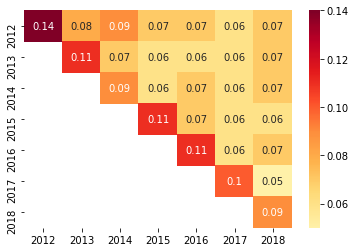

In [28]:
sns.heatmap(results_df.round(2), annot=True, cmap="YlOrRd", center=results_df.round(2).loc[2018, 2018])
plt.show()

In [29]:
avg_2012 = [norm_avg_cos(cosine(svdtv_2012, svdtv_2012), 0.01669324951856645),
            norm_avg_cos(cosine(svdtv_2012, svdtv_2013), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2012, svdtv_2014), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2012, svdtv_2015), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2012, svdtv_2016), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2012, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2012, svdtv_2018), 0.01669324951856645)]

In [30]:
avg_2013 = [None,
            norm_avg_cos(cosine(svdtv_2013, svdtv_2013), 0.01669324951856645),
            norm_avg_cos(cosine(svdtv_2013, svdtv_2014), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2013, svdtv_2015), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2013, svdtv_2016), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2013, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2013, svdtv_2018), 0.01669324951856645)]

In [31]:
avg_2014 = [None,
            None,
            norm_avg_cos(cosine(svdtv_2014, svdtv_2014), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2014, svdtv_2015), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2014, svdtv_2016), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2014, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2014, svdtv_2018), 0.01669324951856645)]

In [32]:
avg_2015 = [None,
            None,
            None, 
            norm_avg_cos(cosine(svdtv_2015, svdtv_2015), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2015, svdtv_2016), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2015, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2015, svdtv_2018), 0.01669324951856645)]

In [33]:
avg_2016 = [None,
            None,
            None, 
            None, 
            norm_avg_cos(cosine(svdtv_2016, svdtv_2016), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2016, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2016, svdtv_2018), 0.01669324951856645)]

In [34]:
avg_2017 = [None,
            None,
            None, 
            None, 
            None, 
            norm_avg_cos(cosine(svdtv_2017, svdtv_2017), 0.01669324951856645), 
            norm_avg_cos(cosine(svdtv_2017, svdtv_2018), 0.01669324951856645)]

In [35]:
avg_2018 = [None,
            None,
            None, 
            None, 
            None, 
            None, 
            norm_avg_cos(cosine(svdtv_2018, svdtv_2018), 0.01669324951856645)]

In [36]:
avgs_df = pd.DataFrame([avg_2012, avg_2013, avg_2014, avg_2015, avg_2016, avg_2017, avg_2018], columns=[2012,2013,2014,2015,2016,2017,2018], index=[2012,2013,2014,2015,2016,2017,2018])

In [38]:
avgs_df.round(2)

,2012,2013,2014,2015,2016,2017,2018
2012,1.0,0.4,-0.13,0.42,0.21,0.05,0.14
2013,NaN,0.3,-0.06,0.16,0.01,-0.00,-0.01
2014,NaN,NaN,0.16,0.00,-0.01,0.03,0.00
2015,NaN,NaN,NaN,0.36,0.12,0.06,0.17
2016,NaN,NaN,NaN,NaN,0.59,0.18,0.18
2017,NaN,NaN,NaN,NaN,NaN,0.41,0.10
2018,NaN,NaN,NaN,NaN,NaN,NaN,0.23


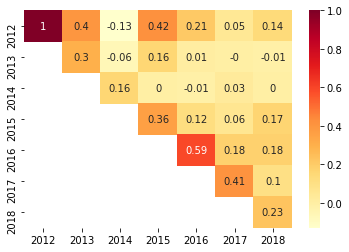

In [40]:
sns.heatmap(avgs_df.round(2), annot=True, cmap="YlOrRd")
plt.show()

In [41]:
savg_2012 = [avg_cosine(cosine(svdtv_2012, svdtv_2012)),
            avg_cosine(cosine(svdtv_2012, svdtv_2013)), 
            avg_cosine(cosine(svdtv_2012, svdtv_2014)), 
            avg_cosine(cosine(svdtv_2012, svdtv_2015)), 
            avg_cosine(cosine(svdtv_2012, svdtv_2016)),
            avg_cosine(cosine(svdtv_2012, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2012, svdtv_2018))]

savg_2013 = [None,
            avg_cosine(cosine(svdtv_2013, svdtv_2013)), 
            avg_cosine(cosine(svdtv_2013, svdtv_2014)), 
            avg_cosine(cosine(svdtv_2013, svdtv_2015)), 
            avg_cosine(cosine(svdtv_2013, svdtv_2016)),
            avg_cosine(cosine(svdtv_2013, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2013, svdtv_2018))]

savg_2014 = [None,
            None, 
            avg_cosine(cosine(svdtv_2014, svdtv_2014)), 
            avg_cosine(cosine(svdtv_2014, svdtv_2015)), 
            avg_cosine(cosine(svdtv_2014, svdtv_2016)),
            avg_cosine(cosine(svdtv_2014, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2014, svdtv_2018))]

savg_2015 = [None,
            None, 
            None, 
            avg_cosine(cosine(svdtv_2015, svdtv_2015)), 
            avg_cosine(cosine(svdtv_2015, svdtv_2016)),
            avg_cosine(cosine(svdtv_2015, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2015, svdtv_2018))]

savg_2016 = [None,
            None, 
            None, 
            None, 
            avg_cosine(cosine(svdtv_2016, svdtv_2016)),
            avg_cosine(cosine(svdtv_2016, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2016, svdtv_2018))]

savg_2017 = [None,
            None, 
            None, 
            None, 
            None,
            avg_cosine(cosine(svdtv_2017, svdtv_2017)), 
            avg_cosine(cosine(svdtv_2017, svdtv_2018))]

savg_2018 = [None,
             None,
             None,
             None,
             None,
             None,
            avg_cosine(cosine(svdtv_2012, svdtv_2018))]

In [42]:
savgs_df = pd.DataFrame([savg_2012, savg_2013, savg_2014, savg_2015, savg_2016, savg_2017, savg_2018], columns=range(2012,2019), index=range(2012,2019))

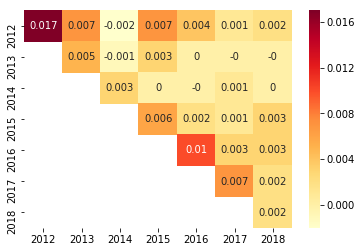

In [45]:
sns.heatmap(savgs_df.round(3), annot=True, cmap="YlOrRd")
plt.show()